In [1]:
import tensorflow as tf  # now import the tensorflow module
import numpy as np
import pandas as pd


In [2]:
df_train = pd.read_csv('D:/Datasets/UNSW-NB15 Dataset/UNSW_NB15_training-set.csv')
df_test = pd.read_csv('D:/Datasets/UNSW-NB15 Dataset/UNSW_NB15_testing-set.csv')  #insert data source location here

In [3]:
df_train.dtypes #checking data types 

id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

In [4]:
df_train["proto"] = df_train["proto"].astype('category')
df_train["service"] = df_train["service"].astype('category')
df_train["state"] = df_train["state"].astype('category')

df_test["proto"] = df_test["proto"].astype('category')
df_test["service"] = df_test["service"].astype('category')
df_test["state"] = df_test["state"].astype('category')


In [5]:
df_train["proto"] = df_train["proto"].cat.codes
df_train["service"] = df_train["service"].cat.codes
df_train["state"] = df_train["state"].cat.codes

df_test["proto"] = df_test["proto"].cat.codes
df_test["service"] = df_test["service"].cat.codes
df_test["state"] = df_test["state"].cat.codes

In [6]:
df_train = df_train.drop(["id", "attack_cat"], axis=1)
df_test = df_test.drop(["id", "attack_cat"], axis=1)

In [7]:
X_train = df_train.drop('label',axis='columns')
X_test = df_test.drop('label',axis='columns')

Y_train = df_train.label
Y_test = df_test.label

In [8]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [9]:
model.fit(X_train,Y_train)


GaussianNB()

In [10]:
print("The accuracy of the Naive Bayes model is", model.score(X_test,Y_test))


The accuracy of the Naive Bayes model is 0.7733901369331759


In [11]:
X_test[0:10]

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,0.121478,113,0,2,6,4,258,172,74.087490,252,...,1,1,1,1,0,0,0,1,1,0
1,0.649902,113,0,2,14,38,734,42014,78.473372,62,...,1,1,1,2,0,0,0,1,6,0
2,1.623129,113,0,2,8,16,364,13186,14.170161,62,...,2,1,1,3,0,0,0,2,6,0
3,1.681642,113,3,2,12,12,628,770,13.677108,62,...,2,1,1,3,1,1,0,2,1,0
4,0.449454,113,0,2,10,6,534,268,33.373826,254,...,2,2,1,40,0,0,0,2,39,0
5,0.380537,113,0,2,10,6,534,268,39.417980,254,...,2,2,1,40,0,0,0,2,39,0
6,0.637109,113,0,2,10,8,534,354,26.683033,254,...,1,1,1,40,0,0,0,1,39,0
7,0.521584,113,0,2,10,8,534,354,32.593026,254,...,3,3,1,40,0,0,0,3,39,0
8,0.542905,113,0,2,10,8,534,354,31.313031,254,...,3,3,1,40,0,0,0,3,39,0
9,0.258687,113,0,2,10,6,534,268,57.985135,254,...,3,3,1,40,0,0,0,3,39,0


In [12]:
Y_test[234:244]

234    0
235    0
236    0
237    0
238    0
239    0
240    0
241    0
242    0
243    0
Name: label, dtype: int64

In [13]:
model.predict(X_test[234:244])

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

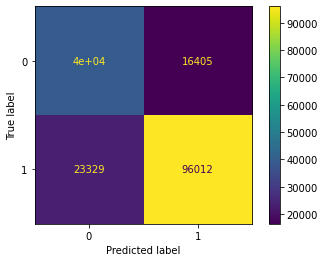

In [14]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, Y_test)

In [15]:
len(X_test)

175341